In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,preprocessing
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor

In [40]:
df=pd.read_csv('datasets/challenge-dataset.csv')

df=df[df['year']!=2016]

In [41]:
keep_index=[]
for index in df.index:
    if '-' not in df.loc[index,'world_rank']:
        keep_index.append(index)

df=df.iloc[keep_index,:]

df['female_male_ratio']=df['female_male_ratio'].apply(lambda x: 50 if pd.isnull(x) else x.split(':')[0])

mean_international_students=np.mean(df[pd.notnull(df['international_students'])]\
                                ['international_students'].apply(lambda x: int(x.split('%')[0])).values)
df['international_students']=df['international_students'].apply(lambda x: mean_international_students if\
                                                        pd.isnull(x) else x.split('%')[0])

df=df[pd.notnull(df['num_students'])]

df['num_students']=df['num_students'].apply(lambda x: int(x.replace(',',"")))

df=df[pd.notnull(df['total_score'])]
df['total_score']=df['total_score'].astype(float)

df['world_rank']=df['world_rank'].astype(int)

keep_columns=[u'world_rank', u'country', u'teaching', u'international', u'research', u'citations', u'total_score',
    u'student_staff_ratio', u'international_students', u'female_male_ratio','year']

df=df[keep_columns]

for col in ['teaching',u'international', u'research', u'citations']:
    temp_index=[]
    for index in df.index:
        if df.loc[index,col]!='-':
            temp_index.append(index)
    temp=df.loc[temp_index,:].copy()
    temp_value=np.mean(temp[col].apply(lambda x: float(x)).values)
    df[col]=df[col].apply(lambda x: temp_value if x=='-' else float(x))
    
df['international_students']=df['international_students'].astype(float)
df['female_male_ratio']=df['female_male_ratio'].astype(float)

# df=df.merge(pd.get_dummies(df['country']),left_index=True,right_index=True)
del df['country']

test_set=df[df['year']==2015].copy()
df=df[df['year']!=2015]
del test_set['year']
del df['year']

In [42]:
x_train=df.copy()
del x_train['total_score']
y_train=df[u'total_score'].copy()

x_test=test_set.copy()
del x_test['total_score']
y_test=test_set['total_score'].copy()

In [43]:
def test_model(model,boolean=False):
    model.fit(x_train,y_train)
    print model.score(x_test,y_test)
    if boolean:
        return model.predict(x_test),model.coef_
    return

In [44]:
preds,coef=test_model(linear_model.LinearRegression(),True)
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(GradientBoostingRegressor())

0.998297428435
0.992897656425
0.993914448357
0.994741694833


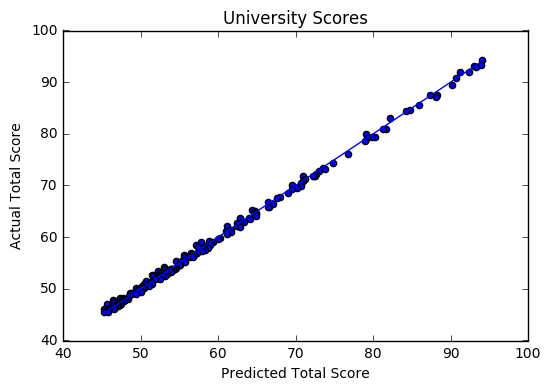

In [45]:
plt.scatter(preds,y_test)
plt.plot(preds,preds,'-')
plt.ylabel('Actual Total Score')
plt.xlabel('Predicted Total Score')
plt.title('University Scores')
plt.show()

In [46]:
coef_df=zip(x_train.columns,model.coef_)
coef_df.sort(key=lambda x: np.abs(x[1]),reverse=True)
pd.DataFrame(coef_df,columns=['Coefficient','Beta'])

,Coefficient,Beta
0,research,0.308718
1,citations,0.293990
2,teaching,0.291857
3,international,0.071073
4,female_male_ratio,-0.009186
5,world_rank,-0.004795
6,international_students,0.004634
7,student_staff_ratio,-0.000006
